In [1]:
import cv2
print(cv2.__version__)

4.8.0


In [2]:
from matplotlib import pyplot as plt

### **1. SOBEL OPERATOR**

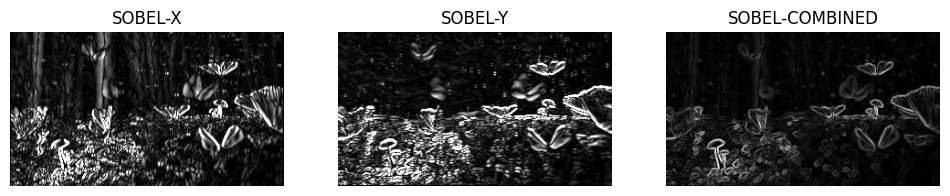

In [3]:
# Load the image
img = cv2.imread('cv7.jpg', cv2.IMREAD_GRAYSCALE)

# Apply sobel filter
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
sobel_combined= cv2.magnitude(sobelx, sobely)

# Convert to 8-bit
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.convertScaleAbs(sobely)

# Display the images
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('SOBEL-X')
plt.imshow(sobelx, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('SOBEL-Y')
plt.imshow(sobely, cmap='gray')
plt.axis('off')


plt.subplot(1,3,3)
plt.title('SOBEL-COMBINED')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.show()


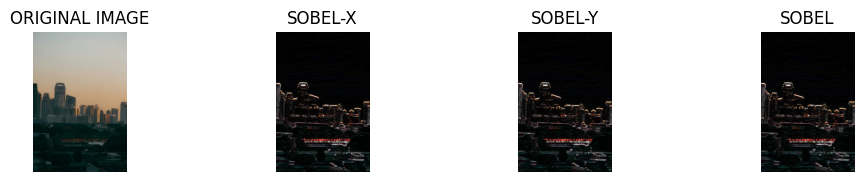

In [4]:
# Load the image(COLORS) file
img = cv2.imread('cv8.jpg')

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the channel into red, green, blue
r, g, b = cv2.split(img_rgb)

# Apply SOBEL to each channel
# Apply in the X-direction
sobelx_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
sobelx_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
sobelx_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)

# Apply in the Y-direction
sobel_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
sobel_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
sobel_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
sobel_combined_r = cv2.magnitude(sobelx_r, sobel_r)
sobel_combined_g = cv2.magnitude(sobelx_g, sobel_g)
sobel_combined_b = cv2.magnitude(sobelx_b, sobel_b)

# Convert to 8-bit
sobel_r_x_abs = cv2.convertScaleAbs(sobelx_r)
sobel_g_x_abs = cv2.convertScaleAbs(sobelx_g)
sobel_b_x_abs = cv2.convertScaleAbs(sobelx_b)

sobel_r_y_abs = cv2.convertScaleAbs(sobel_r)
sobel_g_y_abs = cv2.convertScaleAbs(sobel_g)
sobel_b_y_abs = cv2.convertScaleAbs(sobel_b)

sobel_r=cv2.convertScaleAbs(sobel_r)
sobel_g=cv2.convertScaleAbs(sobel_g)
sobel_b=cv2.convertScaleAbs(sobel_b)

# Merge the channels back together
sobel_ig_x = cv2.merge([sobel_r_x_abs, sobel_g_x_abs, sobel_b_x_abs])
sobel_ig_x = cv2.merge([sobel_r_y_abs, sobel_g_y_abs, sobel_b_y_abs])
sobel_ig=cv2.merge([sobel_r, sobel_g, sobel_b])

# Display the images
plt.figure(figsize=(12,4))
plt.subplot(2,4,1)
plt.title('ORIGINAL IMAGE')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(2,4,2)
plt.title('SOBEL-X')
plt.imshow(sobel_ig_x)
plt.axis('off')

plt.subplot(2,4,3)
plt.title('SOBEL-Y')
plt.imshow(sobel_ig_x)
plt.axis('off')

plt.subplot(2,4,4)
plt.title('SOBEL')
plt.imshow(sobel_ig)
plt.axis('off')

plt.show()



# # Apply sobel filter
# sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

### **2. PREWITT EDGE DETECTION**

In [5]:
import numpy as np

(-0.5, 299.5, 449.5, -0.5)

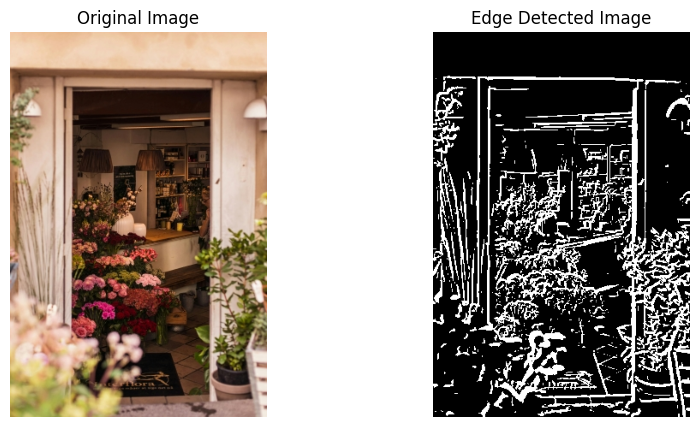

In [6]:
def prewitt_edge(img):

   # Convert image into grayscale
   gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

   # Horizontal prewitt kernel
   kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
   horizontal_edge = cv2.filter2D(gray_img, -1, kernel_x)
   # Vertical prewitt kernel
   kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
   vertical_edge = cv2.filter2D(gray_img, -1, kernel_y)
   # Ensuring both have same data type
   horizontal_edge = np.float32(horizontal_edge)
   vertical_edge = np.float32(vertical_edge)
   # Compute the magnitude
   grad_mag = cv2.magnitude(horizontal_edge, vertical_edge)
   # Applying threshold
   threshold=50
   _,edges=cv2.threshold(grad_mag, threshold,255,cv2.THRESH_BINARY)
   return edges

# Read the image
img = cv2.imread('cv9.jpg')

# Apply prewitt edge detection
edges = prewitt_edge(img)

# Plot the detected edges

plt.figure(figsize=(10,5))
# Original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Edge detected image
plt.subplot(1,2,2)
plt.title('Edge Detected Image')
plt.imshow(edges, cmap='gray')
plt.axis('off')



### **Colored Image**

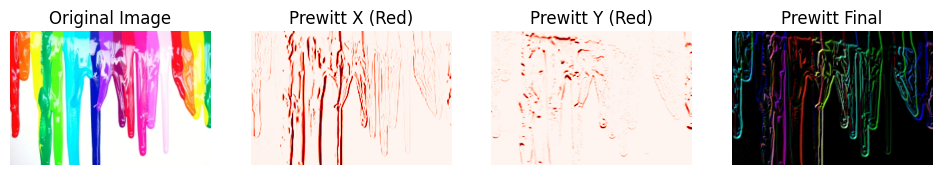

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_edge(img):
    # Read the image
    img = cv2.imread(img)
    
    # Convert image into RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Horizontal prewitt kernel
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

    # Vertical prewitt kernel
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Split the image into red, green, and blue channels
    r, g, b = cv2.split(img_rgb)

    # Apply the Prewitt filters to each channel
    Gx_r = cv2.filter2D(r, -1, kernel_x)
    Gy_r = cv2.filter2D(r, -1, kernel_y)
    Gx_g = cv2.filter2D(g, -1, kernel_x)
    Gy_g = cv2.filter2D(g, -1, kernel_y)
    Gx_b = cv2.filter2D(b, -1, kernel_x)
    Gy_b = cv2.filter2D(b, -1, kernel_y)

    # Compute the magnitude of edges
    edges_r = cv2.addWeighted(Gx_r, 0.5, Gy_r, 0.5, 0)
    edges_g = cv2.addWeighted(Gx_g, 0.5, Gy_g, 0.5, 0)
    edges_b = cv2.addWeighted(Gx_b, 0.5, Gy_b, 0.5, 0)

    # Merge the results
    combined_edges = cv2.merge([edges_r, edges_g, edges_b])

    return img_rgb, Gx_r, Gy_r, Gx_g, Gy_g, Gx_b, Gy_b, combined_edges

# Apply Prewitt edge detection
img_rgb, Gx_r, Gy_r, Gx_g, Gy_g, Gx_b, Gy_b, combined_edges = prewitt_edge('cv10.jpg')

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Prewitt X (Red)')
plt.imshow(Gx_r, cmap='Reds')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Prewitt Y (Red)')
plt.imshow(Gy_r, cmap='Reds')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Prewitt Final')
plt.imshow(combined_edges)
plt.axis('off')

plt.show()


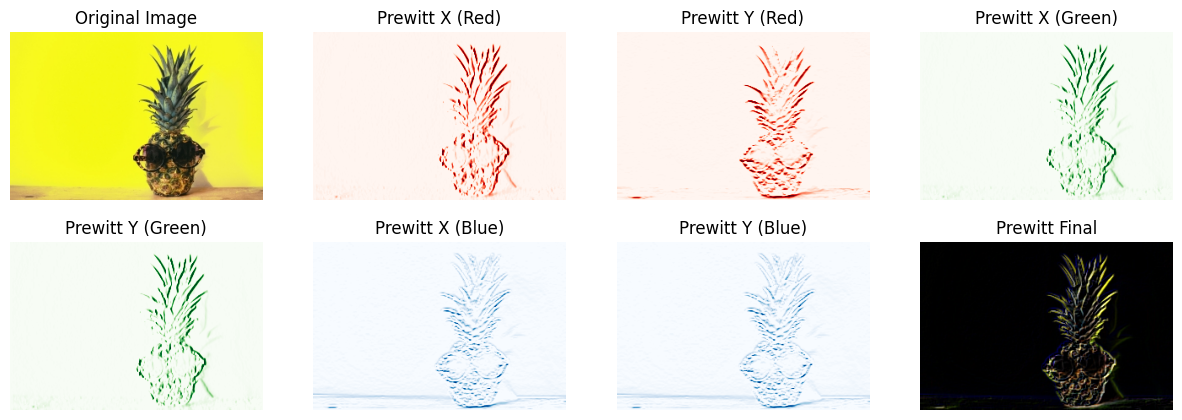

<Figure size 640x480 with 0 Axes>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_edge(img):
    # Read the image
    img = cv2.imread(img)
    
    # Convert image into RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Horizontal prewitt kernel
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

    # Vertical prewitt kernel
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Split the image into red, green, and blue channels
    r, g, b = cv2.split(img_rgb)

    # Apply the Prewitt filters to each channel
    Gx_r = cv2.filter2D(r, -1, kernel_x)
    Gy_r = cv2.filter2D(r, -1, kernel_y)
    Gx_g = cv2.filter2D(g, -1, kernel_x)
    Gy_g = cv2.filter2D(g, -1, kernel_y)
    Gx_b = cv2.filter2D(b, -1, kernel_x)
    Gy_b = cv2.filter2D(b, -1, kernel_y)

    # Compute the magnitude of edges
    edges_r = cv2.addWeighted(Gx_r, 0.5, Gy_r, 0.5, 0)
    edges_g = cv2.addWeighted(Gx_g, 0.5, Gy_g, 0.5, 0)
    edges_b = cv2.addWeighted(Gx_b, 0.5, Gy_b, 0.5, 0)

    # Merge the results
    combined_edges = cv2.merge([edges_r, edges_g, edges_b])

    return img_rgb, Gx_r, Gy_r, Gx_g, Gy_g, Gx_b, Gy_b, combined_edges

# Apply Prewitt edge detection
img_rgb, Gx_r, Gy_r, Gx_g, Gy_g, Gx_b, Gy_b, combined_edges = prewitt_edge('cv11.jpg')

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Prewitt X (Red)')
plt.imshow(Gx_r, cmap='Reds')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Prewitt Y (Red)')
plt.imshow(Gy_r, cmap='Reds')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Prewitt X (Green)')
plt.imshow(Gx_g, cmap='Greens')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Prewitt Y (Green)')
plt.imshow(Gx_g, cmap='Greens')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Prewitt X (Blue)')
plt.imshow(Gy_b, cmap='Blues')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Prewitt Y (Blue)')
plt.imshow(Gy_b, cmap='Blues')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Prewitt Final')
plt.imshow(combined_edges)
plt.axis('off')

plt.show()
plt.tight_layout()



### **3. CANNY EDGE DETECTION**

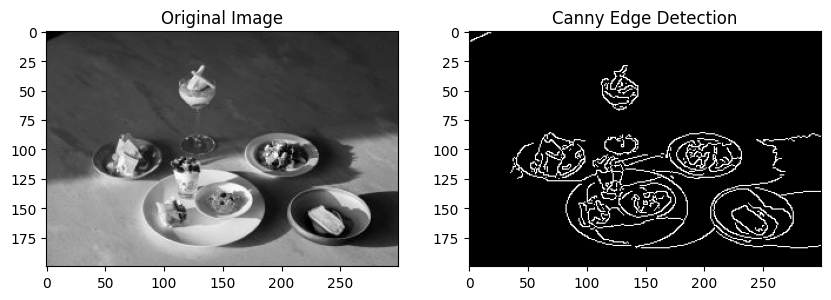

In [9]:
# Load the image
img = cv2.imread('cv12.jpg',cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur
blur = cv2.GaussianBlur(img,(3,3),0)

# Compute the gradient using the SOBEL operator
Gx=cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
Gy=cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(Gx**2+Gy**2)

# Apply Canny Edge Detection
edges=cv2.Canny(blur,50,150) # Lower & Upper threshold values

# Display the results

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis=('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis=('off')

plt.show()



### **Morphological Operations**
## **1. Erosion** 
- Shrinks the white region of the image


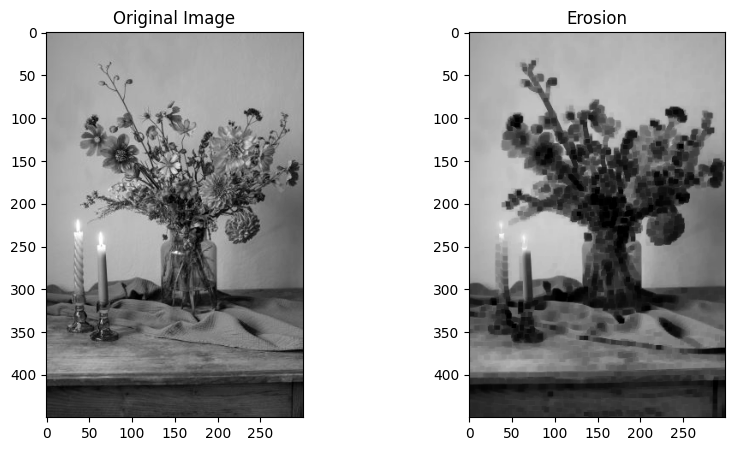

In [18]:
# Read the Image in greyscale format
img = cv2.imread('cv13.jpg', cv2.IMREAD_GRAYSCALE)

# Create a kernel
kernel = np.ones((5,5),np.uint8)

# Apply erosion
erosion = cv2.erode(img, kernel, iterations=1)

# Display the results

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Erosion')
plt.imshow(erosion, cmap='gray')
plt.axis=('off')
plt.show()


## **2. Dialation**
- Opposite of erosion. Increases the white regions by expanding the boundries.

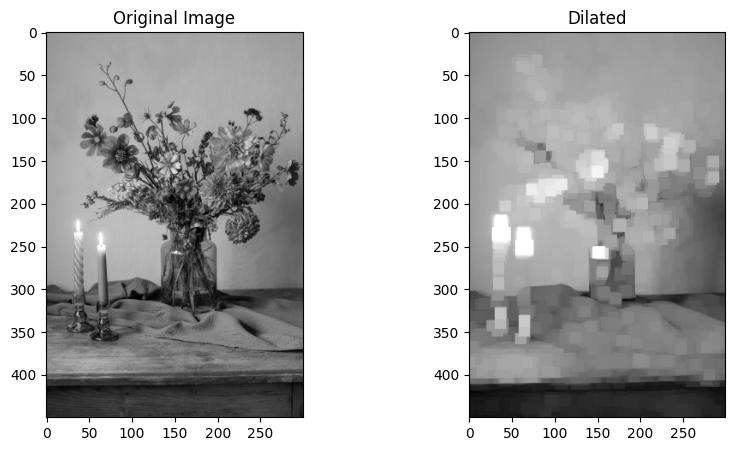

In [19]:
dilated=cv2.dilate(img, kernel, iterations=3)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Dilated')
plt.imshow(dilated, cmap='gray')
plt.axis=('off')
plt.show()


### **3. Opening**
- First erode the image & then dialating the image

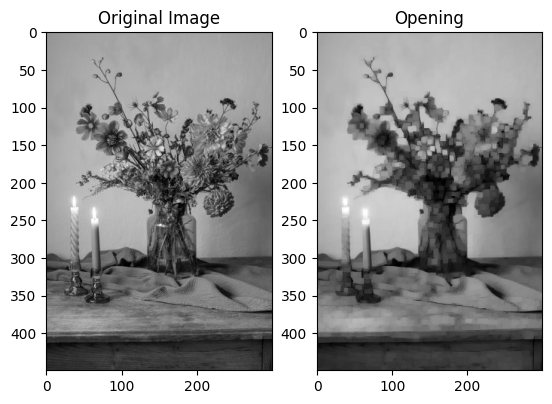

In [20]:
# Apply opening

opened=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.title('Opening')
# plt.axis('off')

plt.show()


### **4. Closing**
- Oposite of opening
- First dialate the image & then erode
- Can close the holes in foreground or small gapes in edges

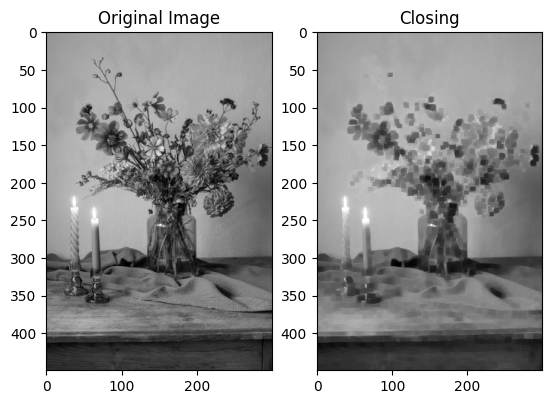

In [21]:
# Apply opening

closed=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title('Closing')
# plt.axis('off')

plt.show()


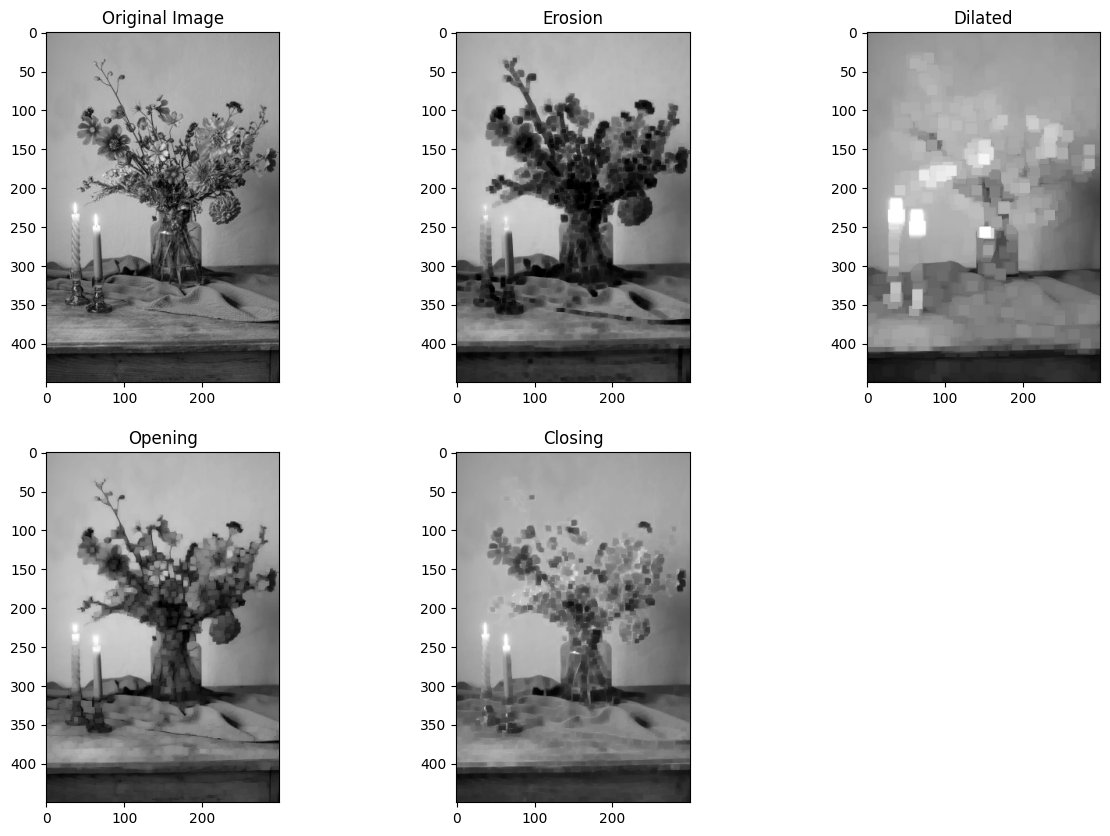

In [26]:
# Read the Image in greyscale format
img = cv2.imread('cv13.jpg', cv2.IMREAD_GRAYSCALE)

# create a kernel
kernel = np.ones((5,5),np.uint8)

# Apply erosion 
erosion = cv2.erode(img, kernel, iterations=1)

# Apply Dialation
dilated=cv2.dilate(img, kernel, iterations=3)

# Apply Opening
opened=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

# Apply Closing
closed=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

# Display the results

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Erosion')
plt.imshow(erosion, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Dilated')
plt.imshow(dilated, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Opening')
plt.imshow(opened, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Closing')
plt.imshow(closed, cmap='gray')
plt.show()

